<a href="https://colab.research.google.com/github/CoffeeTulip/CS39AA-Project/blob/main/CS39AAFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 1


#Introduction
The following will be some exploratory data analysis of a HuggingFace translation dataset consisting of multiple languages and translated text. The goal is to build a translator off of this dataset to make accurate translations between **English and Spanish**. This is a type of encoder-decoder problem, where a sequence to sequence model will be used. Laguages as a whole carries a lot of ambiguity. Accuracy of translations can be very dependant on the context, slang, and emotions can be hard to capture. This project aims to explore these problems through exploring the data and building a small translator.

In [96]:
# import all of the python modules/packages you'll need here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install datasets
!pip install nltk
import datasets
from datasets import load_dataset
from datasets import DatasetDict



In [97]:
# Convert dataset dict to dataset, seperate the splits from the whole so I can view it and alter it better
df = load_dataset("Amani27/massive_translation_dataset")
df = DatasetDict(df)

df_train = pd.DataFrame.from_dict(df['train'])
df_validation = pd.DataFrame.from_dict(df['validation'])
df_test = pd.DataFrame.from_dict(df['test'])
df = pd.concat([df_train, df_validation, df_test], ignore_index=True)

df.head(10)

,id,split,en_US,de_DE,hi_IN,es_ES,fr_FR,it_IT,ar_SA,nl_NL,ja_JP,pt_PT
0,1,train,wake me up at nine am on friday,weck mich am freitag um neun uhr auf,शुक्रवार को सुबह नौ बजे मुझे जगा दो,despiértame a las nueve de la mañana el viernes,réveille-moi à neuf heures du matin le vendredi,svegliami alle nove di mattina venerdì,صحيني تسعة الصباح يوم الجمعة,maakt mijn wakker om negen uur in de ochtend o...,金曜日の午前九時に起こしてください,acorda-me às nove da manhã na sexta-feira
1,2,train,set an alarm for two hours from now,stell einen wecker für zwei stunden ab jetzt,अभी से दो घंटे के लिए अलार्म लगाओ,pon una alarma en dos horas desde ahora,régler une alarme pour deux heures à partir dè...,imposta una sveglia tra due ore,حط منبه بعد ساعتين من الحين,zet een alarm voor twee uur vanaf nu,今から二時間後にアラームをセットする,accionar um alarme durante duas horas a partir...
2,4,train,olly quiet,olly leise,olly चुप रहो,olly silencio,olly silence,olly zitto,olly هدوء,stil ollie,静かに,olly não fales
3,5,train,stop,stopp,रुको,parar,stop,ferma,وقف,stoppen,止めて,pára
4,6,train,olly pause for ten seconds,olly pausiere für zehn sekunden,olly दस सेकंड के लिए रुको,olly para por un minuto,olly mets en pause pour dix secondes,olly metti in pausa per dieci secondi,أوللي وقف مؤقتاً لمدة عشر ثواني,olly pauzeer voor tien seconden,十秒間ポーズして,olly pára durante dez segundos
5,7,train,pause for ten seconds,für zehn sekunden pausieren,दस सेकंड के लिए रुकें,para por diez segundos,pause pendant dix secondes,metti in pausa per dieci secondi,توقف مؤقتا لمدة عشر ثواني,pauze voor tien seconden,十秒停止,pausa por dez segundos
6,9,train,make the lighting bit more warm here,mach die beleuchtung hier etwas wärmer,यहां रोशनी को थोड़ा अधिक गर्म करें,haz que la luz sea un poco mas cálida aquí,rendre la luminosité un peu plus chaud ici,rendi la luce un po' più calda qui dentro,اجعل الإضاءة أكثر دفء بقليل هنا,maak de verlichting een beetje meer warm hier,ここは照明をもう少し暖色にして,tornar a iluminação um pouco mais calorosa aqui
7,10,train,please set the lighting suitable for reading,stelle bitte die beleuchtung passend zum lesen...,लाइट को पढ़ने के लिए उपयुक्त होने तक सेट करें,por favor pon la luz adecuada para leer,merci de régler l'éclairage adapté à la lecture,imposta l' illuminazione adatta per leggere,تكفى اضبط الإضاءة وخلها مريحة للقراءة,zet de verlichting passend om te lezen,読書に相応しいライトに設定して,definir a iluminação adequada para leitura
8,12,train,time to sleep,zeit zu schlafen,सोने का समय,hora de dormir,l'heure de dormir,è ora di andare a letto,وقت النوم,tijd om te gaan slapen,寝る時間,hora de cormir
9,13,train,time to sleep olly,zeit schlafen zu gehen olly,सोने का समय olly,hora de dormir olly,l'heure de dormir olly,buonanotte olly,وقت النوم يا olly,tijd om te gaan slapen olly,olly 眠る時間,tempo de dormir olly


In [98]:
columns_to_drop = ['id', 'split', 'de_DE', 'hi_IN', 'fr_FR', 'it_IT', 'ar_SA', 'nl_NL', 'ja_JP', 'pt_PT' ]
df = df.drop(columns = columns_to_drop)


In [99]:
df.head(10)

,en_US,es_ES
0,wake me up at nine am on friday,despiértame a las nueve de la mañana el viernes
1,set an alarm for two hours from now,pon una alarma en dos horas desde ahora
2,olly quiet,olly silencio
3,stop,parar
4,olly pause for ten seconds,olly para por un minuto
5,pause for ten seconds,para por diez segundos
6,make the lighting bit more warm here,haz que la luz sea un poco mas cálida aquí
7,please set the lighting suitable for reading,por favor pon la luz adecuada para leer
8,time to sleep,hora de dormir
9,time to sleep olly,hora de dormir olly


**DISTRIBUTION**



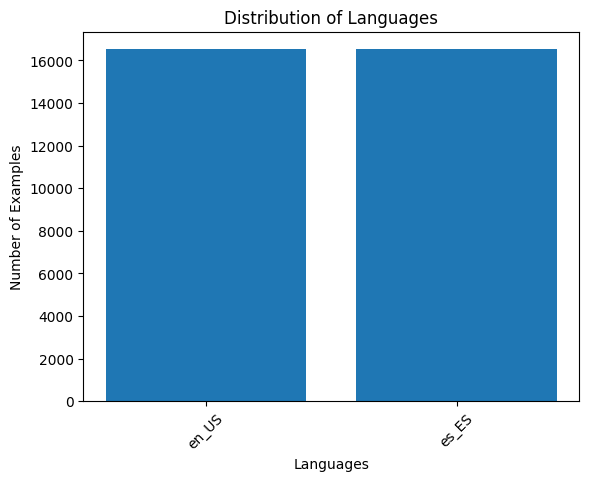

In [100]:
language_columns = ['en_US', 'es_ES']
language_distribution = df[language_columns].count()

plt.bar(language_distribution.index, language_distribution.values)
plt.xlabel('Languages')
plt.ylabel('Number of Examples')
plt.title('Distribution of Languages')
plt.xticks(rotation=45)
plt.show()


**TEXT LENGTH ANALYSIS**

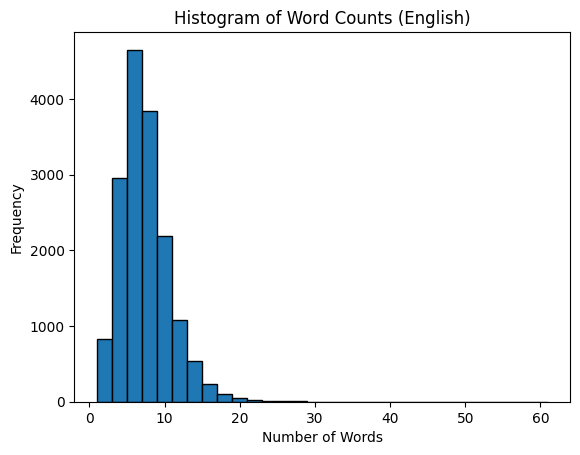

Mean Word Count: 6.89915864657103
Median Word Count: 6.0
Minimum Word Count: 1
Maximum Word Count: 61


In [101]:
english_text = df['en_US']

# Count the number of words (excluding spaces) in each text entry
english_word_counts = english_text.apply(lambda x: len(x.split()))

# Create a histogram of word counts
plt.hist(english_word_counts, bins=30, edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts (English)')
plt.show()

# Display summary statistics for word counts
mean_word_count = english_word_counts.mean()
median_word_count = english_word_counts.median()
min_word_count = english_word_counts.min()
max_word_count = english_word_counts.max()

print(f"Mean Word Count: {mean_word_count}")
print(f"Median Word Count: {median_word_count}")
print(f"Minimum Word Count: {min_word_count}")
print(f"Maximum Word Count: {max_word_count}")


#Text Length Analysis

In [102]:
english_text_length = df['en_US'].apply(len)
mean_length = english_text_length.mean()
median_length = english_text_length.median()
min_length = english_text_length.min()
max_length = english_text_length.max()

spanish_text_length = df['es_ES'].apply(len)
s_mean_length = spanish_text_length.mean()
s_median_length = spanish_text_length.median()
s_min_length = spanish_text_length.min()
s_max_length = spanish_text_length.max()

print("english mean length:", mean_length)
print("Spanish mean length:", s_mean_length)

# print(f"Spanish Mean Length: {s_mean_length}")
# print(f"Spanish Median Length: {s_median_length}")
# print(f"Spanish Minimum Length: {s_min_length}")
# print(f"Spanish Maximum Length: {s_max_length}")

# print(f"English Mean Length: {mean_length}")
# print(f"English Median Length: {median_length}")
# print(f"English Minimum Length: {min_length}")
# print(f"English Maximum Length: {max_length}")

english mean length: 34.9222202045881
Spanish mean length: 39.49421947823981


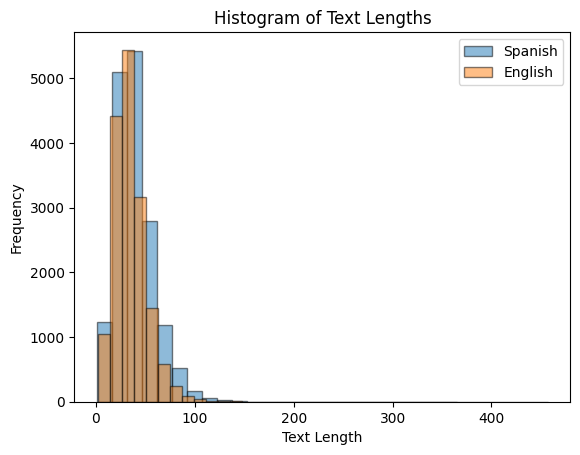

In [103]:
plt.hist(spanish_text_length, alpha=0.5, label='Spanish', bins=30, edgecolor='black')
plt.hist(english_text_length, alpha=0.5, label='English', bins=30, edgecolor='black')

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Lengths')
plt.legend()
plt.show()

In [104]:
missing_values_total = df.isnull().sum()

#Check for missing values in each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_info = pd.DataFrame({
    'Total Missing Values': missing_values_total,
    'Percentage of Missing Values': missing_values_percentage
})

missing_values_info = missing_values_info.sort_values(by='Percentage of Missing Values', ascending=False)
missing_values_info


,Total Missing Values,Percentage of Missing Values
en_US,0,0.0
es_ES,0,0.0


In [105]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

english_column = 'en_US'
spanish_column = 'es_ES'

# Tokenize English. The text dataset looked cleaned up already but just to be safe
english_text = ' '.join(df[english_column].astype(str).values)
english_tokens = word_tokenize(english_text.lower())

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english') + list(string.punctuation))
english_filtered_tokens = [word for word in english_tokens if word.isalnum() and word not in stop_words]

# Get the most common words in English
english_common_words = Counter(english_filtered_tokens).most_common(10)

# Tokenize Spanish
spanish_text = ' '.join(df[spanish_column].astype(str).values)
spanish_tokens = word_tokenize(spanish_text.lower())  # Convert to lowercase for consistency

# Remove stopwords and punctuation
stop_words = set(stopwords.words('spanish') + list(string.punctuation))
spanish_filtered_tokens = [word for word in spanish_tokens if word.isalnum() and word not in stop_words]

# Get the most common words in Spanish
spanish_common_words = Counter(spanish_filtered_tokens).most_common(10)


# Display the results
print("Most common words in English:")
print(english_common_words)

print("\nMost common words in Spanish:")
print(spanish_common_words)


Most common words in English:
[('please', 1440), ('play', 1173), ('today', 849), ('list', 770), ('email', 718), ('new', 701), ('tell', 697), ('time', 650), ('set', 563), ('olly', 534)]

Most common words in Spanish:
[('favor', 1284), ('hoy', 865), ('lista', 859), ('correo', 859), ('mañana', 765), ('pon', 728), ('hora', 591), ('electrónico', 554), ('cuál', 542), ('puedes', 511)]


In [107]:
# Calculate vocabulary size for Spanish
spanish_vocab_size = len(set(spanish_filtered_tokens))
# Calculate vocabulary size for English
english_vocab_size = len(set(english_filtered_tokens))

print("Vocabulary size in English:", english_vocab_size)
print("Vocabulary size in Spanish:", spanish_vocab_size)

Vocabulary size in English: 5958
Vocabulary size in Spanish: 7785


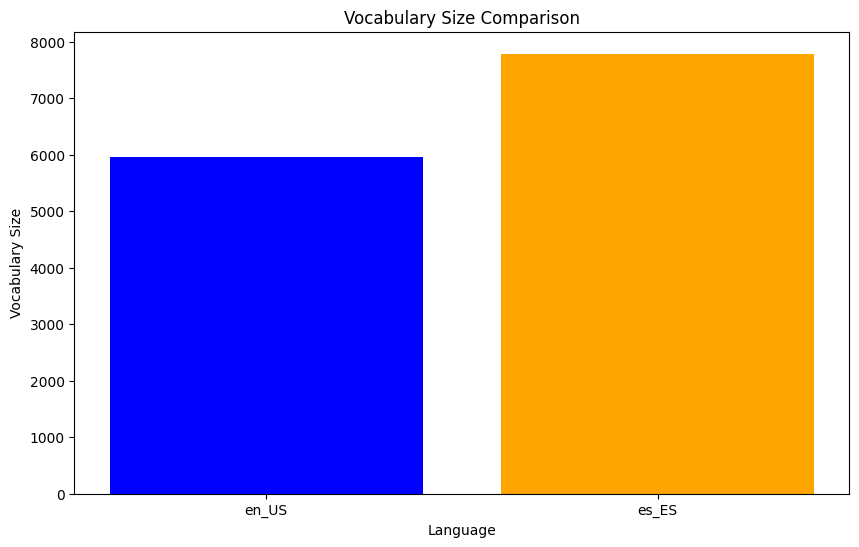

In [108]:
vocab_sizes = [english_vocab_size, spanish_vocab_size]
plt.figure(figsize=(10, 6))
plt.bar(language_columns, vocab_sizes, color=['blue', 'orange'])
plt.xlabel('Language')
plt.ylabel('Vocabulary Size')
plt.title('Vocabulary Size Comparison')
plt.show()

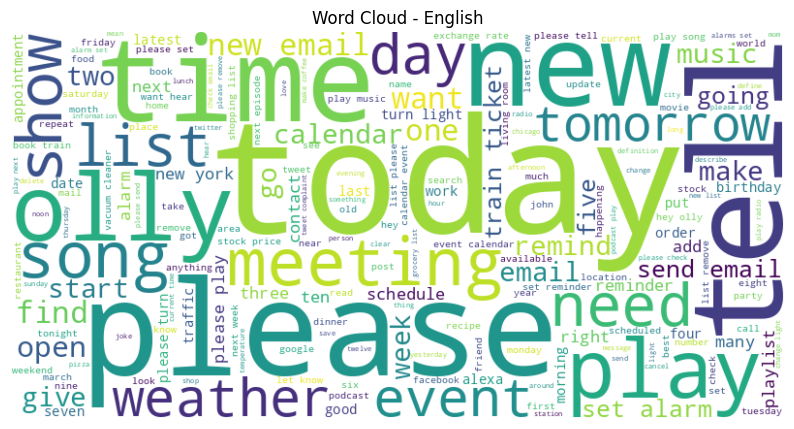

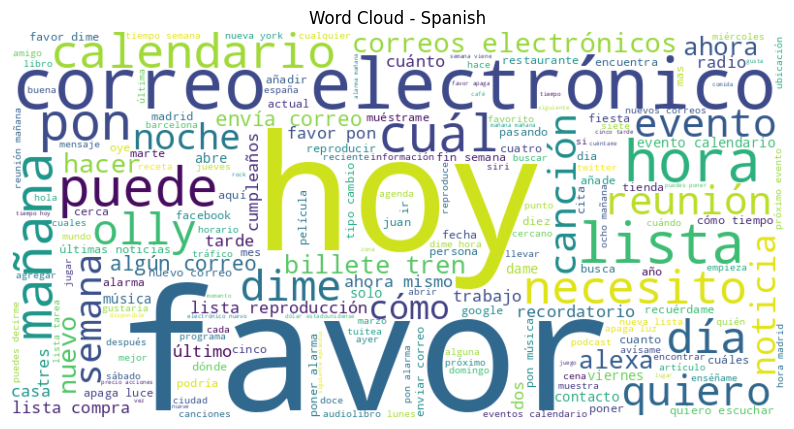

In [109]:
from wordcloud import WordCloud

# Make a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_word_cloud(english_filtered_tokens, 'Word Cloud - English')
generate_word_cloud(spanish_filtered_tokens, 'Word Cloud - Spanish')
